In [1]:
#importo le librerie necessarie
import numpy as np
import pandas as pd

#definisco l'algoritmo come una classe
class Perceptron(object):
    
    #inizializzatore
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    #funzione per il fitting dei dati di training
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal (loc=0.0, scale=0.01, size=1+X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    #funzione per calcolare il net input
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    #funzione per predire i valori delle y
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [13]:
#import del dataset di training
dataset = pd.read_excel(r"C:\Users\fspadafora\OneDrive - BUSINESS INTEGRATION PARTNERS SPA\Desktop\KAGGLE\spaceship-titanic\train_new.xlsx")

In [14]:
#import del dataset di test
df_test = pd.read_excel(r"C:\Users\fspadafora\OneDrive - BUSINESS INTEGRATION PARTNERS SPA\Desktop\KAGGLE\spaceship-titanic\test_new.xlsx")

In [ ]:
#NON RUNNARE CON DATASET AGGIORNATO
#trasformo le due variabili binarie in true/false 
dataset['CryoSleep'] = np.where(dataset['CryoSleep'] > 0, 'True', 'False')
dataset['VIP'] = np.where(dataset['VIP'] > 0, 'True', 'False')

#rimuovo le variabili non numeriche dal dataset
df = dataset.drop(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'], axis=1)

#rimuovo missing values
df = df.dropna()

In [17]:
#trasformo la variabile target da 0/1 a 1/-1
dataset['Transported'] = np.where(dataset['Transported'] == 0, -1, 1)

In [18]:
#standardizzo le variabili
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

#training
dataset[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck', 'Earth', 
    'Europa','Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'P', 'S', 'A','B', 'C', 'D', 'E', 'F', 'G', 'T'
   ]] = scaler.fit_transform(dataset[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck', 'Earth', 
    'Europa','Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'P', 'S', 'A','B', 'C', 'D', 'E', 'F', 'G', 'T']])

#test
df_test[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck', 'Earth', 
    'Europa','Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'P', 'S', 'A','B', 'C', 'D', 'E', 'F', 'G', 'T'
   ]] = scaler.fit_transform(df_test[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck', 'Earth', 
    'Europa','Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'P', 'S', 'A','B', 'C', 'D', 'E', 'F', 'G', 'T']])

In [24]:
#preparo i vettori X e y di training
y_ = dataset.iloc[0:, 9].values
y = y_.reshape(len(y_), 1)
X1 = dataset.iloc[0:, 0:8].values
X2 = dataset.iloc[0:, 9:].values
X = np.concatenate((X1,X2), axis=1)
#X = df.iloc[0:, [0,1]].values

#preparo il vettore X di test
Xt = df_test.iloc[0:, 0:].values

In [ ]:
#preparo gli array per il grafico nel caso di sole 2 features
lX1 = []
lX2 = []
counter = 0
for xi, target in zip(X, y):
    if target == 1:
        lX1.append(list(X[counter, (0,1)]))
    else:
        lX2.append(list(X[counter, (0,1)]))
    counter += 1
    
X1 = np.asarray(lX1)
X2 = np.asarray(lX2)

In [ ]:
#faccio il grafico delle X nel caso di 2 sole features
import matplotlib.pyplot as plt
plt.scatter(X1[0:100,0], X1[0:100,1], color='red', marker='o', label='transposed = 1')
plt.scatter(X2[0:100,0], X2[0:100,1], color='blue', marker='x',label='transposed = -1')

In [6]:
#inizializzo un'istanza della classe Perceptron (ovvero dell'algoritmo)
p = Perceptron(0.01, 260, 1)

In [7]:
#lancio la funzione per il training del modello
p.fit(X, y)

In [8]:
#vedo i valori dei parametri
p.w_

array([-1.50183757e+02,  9.91138824e+01,  7.26946659e+03, -1.19224469e+03,
       -5.83316569e+02, -4.17413733e+03,  5.34589929e+01,  7.95377271e+02,
       -4.30260504e+03,  1.74662375e+04, -1.78447970e+03,  1.50119970e+03,
        6.01198719e+02,  1.04313447e+03, -5.70123752e+01, -8.87649073e+02,
       -1.35368433e+03,  1.35367383e+03, -1.02191848e+02,  1.32747725e+03,
        8.38941463e+02, -4.01739831e+02, -1.02709615e+03, -6.94077788e+02,
        2.92695382e+02,  6.09892913e+00])

In [9]:
#valuto lo score
score = 1 - (p.errors_[(len(p.errors_) - 1)] / dataset.shape[0])
score

0.6317726906706546

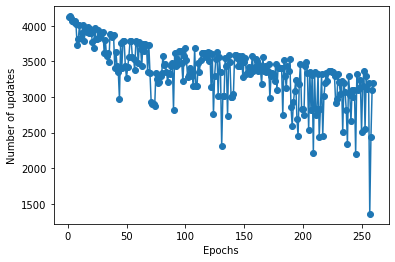

In [10]:
#plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary
import matplotlib.pyplot as plt
plt.plot(range(1, len(p.errors_) + 1),
p.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [26]:
#invoco la funzione predict per predire i valori di 'Transported' del Test set
prediction = p.predict(Xt)

In [11]:
#implementazione del Perceptron di sklearn come termine di paragone
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0, eta0 = 0.01)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

C:\Users\fspadafora\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5090302542275394